In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_agora = pd.read_excel('AGORA2_details.xlsx', index_col=0)
df_agora.head()

PubSeedID  \
MicrobeID                                                                                  
Abiotrophia_defectiva_ATCC_49176             Abiotrophia defectiva ATCC 49176 (592010.4)   
Acaricomes_phytoseiuli_DSM_14247            Acaricomes phytoseiuli DSM 14247 (1120917.3)   
Acaryochloris_marina_MBIC11017                                                       NaN   
Acetanaerobacterium_elongatum_CGMCC_1_5012                                           NaN   
Acetatifactor_muris_GP69                                                             NaN   

                                            2 - complete comparative genomics; 1 - certain comparative genomics; 0 - no comparative genomics  \
MicrobeID                                                                                                                                      
Abiotrophia_defectiva_ATCC_49176                                                            2                                                  
Acaricomes_phytoseiuli_DSM_14247                                                            1                                                  
Acaryochloris_marina_MBIC11017                                                              0                                                  
Acetanaerobacterium_elongatum_CGMCC_1_5012                                                  0                                                  
Acetatifactor_muris_GP69                                                                    0                                                  

                                                                      Strain  \
MicrobeID                                                                      
Abiotrophia_defectiva_ATCC_49176            Abiotrophia defectiva ATCC 49176   
Acaricomes_phytoseiuli_DSM_14247            Acaricomes phytoseiuli DSM 14247   
Acaryochloris_marina_MBIC11017                Acaryochloris marina MBIC11017   
Acetanaerobacterium_elongatum_CGMCC_1_5012     Acetanaerobacterium elongatum   
Acetatifactor_muris_GP69                                 Acetatifactor muris   

                                                                  Species  \
MicrobeID                                                                   
Abiotrophia_defectiva_ATCC_49176                    Abiotrophia defectiva   
Acaricomes_phytoseiuli_DSM_14247                   Acaricomes phytoseiuli   
Acaryochloris_marina_MBIC11017                       Acaryochloris marina   
Acetanaerobacterium_elongatum_CGMCC_1_5012  Acetanaerobacterium elongatum   
Acetatifactor_muris_GP69                              Acetatifactor muris   

                                                          Genus  \
MicrobeID                                                         
Abiotrophia_defectiva_ATCC_49176                    Abiotrophia   
Acaricomes_phytoseiuli_DSM_14247                     Acaricomes   
Acaryochloris_marina_MBIC11017                    Acaryochloris   
Acetanaerobacterium_elongatum_CGMCC_1_5012  Acetanaerobacterium   
Acetatifactor_muris_GP69                          Acetatifactor   

                                                        Family  \
MicrobeID                                                        
Abiotrophia_defectiva_ATCC_49176                 Aerococcaceae   
Acaricomes_phytoseiuli_DSM_14247                Micrococcaceae   
Acaryochloris_marina_MBIC11017              Acaryochloridaceae   
Acetanaerobacterium_elongatum_CGMCC_1_5012    Oscillospiraceae   
Acetatifactor_muris_GP69                       Lachnospiraceae   

                                                      Order  \
MicrobeID                                                     
Abiotrophia_defectiva_ATCC_49176            Lactobacillales   
Acaricomes_phytoseiuli_DSM_14247              Micrococcales   
Acaryochloris_marina_MBIC11017              Synechococcales   
Acetanaerobacterium_elongatum_CGMCC_1_5012    Eubacteriales   
Acetatifactor

In [5]:
# taking only the top 20 abundant families
top_families = df_agora.Family.value_counts().nlargest(20).index
df_agora_top_family = df_agora[df_agora.Family.isin(top_families)]
print(top_families)

Index(['Enterobacteriaceae', 'Streptococcaceae', 'Staphylococcaceae',
       'Enterococcaceae', 'Lachnospiraceae', 'Lactobacillaceae', 'Bacillaceae',
       'Helicobacteraceae', 'Moraxellaceae', 'Bacteroidaceae',
       'Clostridiaceae', 'Campylobacteraceae', 'Bifidobacteriaceae',
       'Pseudomonadaceae', 'Propionibacteriaceae', 'Peptostreptococcaceae',
       'Oscillospiraceae', 'Prevotellaceae', 'Pasteurellaceae',
       'Erysipelotrichaceae'],
      dtype='object', name='Family')


In [6]:
# taking only the top 20 abundant classes
top_classes = df_agora.Class.value_counts().nlargest(20).index
df_agora_top_class = df_agora[df_agora.Class.isin(top_classes)]
print(top_classes)

Index(['Bacilli', 'Gammaproteobacteria', 'Clostridia', 'Actinomycetia',
       'Bacteroidia', 'Epsilonproteobacteria', 'Betaproteobacteria',
       'Coriobacteriia', 'Erysipelotrichia', 'Negativicutes',
       'Alphaproteobacteria', 'Fusobacteriia', 'Tissierellia', 'Mollicutes',
       'Spirochaetia', 'Flavobacteriia', 'Deltaproteobacteria', 'Synergistia',
       'Deinococci', 'Cytophagia'],
      dtype='object', name='Class')


In [50]:
# code to plot tsne and umap plots
def plot_tsne_umap(data_all,data_new,df_agora_top_family,df_agora_top_class):
    fig,ax=plt.subplots(2,3,figsize=(25,7),gridspec_kw={'width_ratios': [1, 1, 0.25]})
    def plot(data,ax,l,t1,t2):
        # including only the top 20 families
        data1 = data.loc[df_agora_top_family.index]
        X1 = data1.values
        # getting the family names of the samples in data1 in same order as in data1
        y1 = df_agora_top_family.loc[data1.index,'Family'].values
        # including only the top 20 classes
        data2 = data.loc[df_agora_top_class.index]
        X2 = data2.values
        # getting the class names of the samples in data2 in same order as in data2
        y2 = df_agora_top_class.loc[data2.index,'Class'].values

        tsne1 = TSNE(
            n_components=2,             
            perplexity=30        
        )
        X_tsne1 = tsne1.fit_transform(X1)

        tsne2 = TSNE(
            n_components=2,             
            perplexity=30        
        )
        X_tsne2 = tsne2.fit_transform(X2)
        
        palette1 = sns.color_palette("hsv", len(np.unique(y1)))
        palette2 = sns.color_palette("hsv", len(np.unique(y2)))
        if l:
            sns.scatterplot(x=X_tsne1[:,0], y=X_tsne1[:,1], hue=y1, palette=palette1, legend='full', alpha=0.7,ax=ax[0])
            sns.scatterplot(x=X_tsne2[:,0], y=X_tsne2[:,1], hue=y2, palette=palette2, legend='full', alpha=0.7,ax=ax[1])
            ax[0].legend(ncol=2,bbox_to_anchor=(1.05, 1.1), loc='upper left', borderaxespad=0,fontsize=12)
            ax[1].legend(ncol=2,bbox_to_anchor=(1.05, 1.1), loc='upper left', borderaxespad=0,fontsize=12)
        else:
            sns.scatterplot(x=X_tsne1[:,0], y=X_tsne1[:,1], hue=y1, palette=palette1, legend=False, alpha=0.7,ax=ax[0])
            sns.scatterplot(x=X_tsne2[:,0], y=X_tsne2[:,1], hue=y2, palette=palette2, legend=False, alpha=0.7,ax=ax[1])
        
        # settting the xticks and xticklabels from -100 to 100 with a step of 25
        ax[0].set_xticks(np.arange(-100, 101, 25))
        ax[0].set_yticks(np.arange(-100, 101, 25))
        ax[1].set_xticks(np.arange(-100, 101, 25))
        ax[1].set_yticks(np.arange(-100, 101, 25))
        # setting the x and y axis limits
        ax[0].set_xlim(-100, 100)
        ax[0].set_ylim(-100, 100)
        ax[1].set_xlim(-100, 100)
        ax[1].set_ylim(-100, 100)
        ax[1].set_xticklabels(np.arange(-100, 101, 25), fontsize=12)
        ax[0].set_xticklabels([])
        if l==0:
            ax[0].set_yticklabels(np.arange(-100, 101, 25), fontsize=12)
            ax[1].set_yticklabels(np.arange(-100, 101, 25), fontsize=12)
        else:
            # setting empty xticklabels
            ax[0].set_yticklabels([])
            ax[1].set_yticklabels([])
        
        ax[0].set_title(t1, fontsize=15)
        ax[1].set_title(t2, fontsize=15)
    # code for diff data
    t1 = 'tSNE plot with top 20 abundant families (All reactions)'
    t2 = 'tSNE plot with top 20 abundant classes (All reactions)'
    plot(data_all,[ax[0,0],ax[1,0]],0,t1,t2)
    t1 = 'tSNE plot with top 20 abundant families (New reactions)'
    t2 = 'tSNE plot with top 20 abundant classes (New reactions)'
    plot(data_new,[ax[0,1],ax[1,1]],1,t1,t2)
    # empyting the other one spine
    ax[0,2].axis('off')
    ax[1,2].axis('off')
    plt.savefig('tsne_agora.png', bbox_inches='tight')
    plt.show()
    return fig, ax


In [8]:
data1= pd.read_csv('tsne_mat_all_rxns.csv',index_col=0)
# remiving the .mat string from the ROW column
data1.index = data1.index.str.replace('.mat','',regex=False)
data1.head()

23DHMPO  26DAPLLAT  2AHBUTI  \
Row                                                                       
Abiotrophia_defectiva_ATCC_49176                  1          1        1   
Acaricomes_phytoseiuli_DSM_14247                  1          1        1   
Acaryochloris_marina_MBIC11017                    1          1        1   
Acetanaerobacterium_elongatum_CGMCC_1_5012        1          1        1   
Acetatifactor_muris_GP69                          1          1        1   

                                            2MBCOATA  3HAD10M12  3HAD11M12  \
Row                                                                          
Abiotrophia_defectiva_ATCC_49176                   1          1          1   
Acaricomes_phytoseiuli_DSM_14247                   1          1          1   
Acaryochloris_marina_MBIC11017                     1          1          1   
Acetanaerobacterium_elongatum_CGMCC_1_5012         1          1          1   
Acetatifactor_muris_GP69                           1          1          1   

                                            3HAD12M14  3HAD13M14  3HAD14M16  \
Row                                                                           
Abiotrophia_defectiva_ATCC_49176                    1          1          1   
Acaricomes_phytoseiuli_DSM_14247                    1          1          1   
Acaryochloris_marina_MBIC11017                      1          1          1   
Acetanaerobacterium_elongatum_CGMCC_1_5012          1          1          1   
Acetatifactor_muris_GP69                            1          1          1   

                                            3HAD15M16  ...  2HANADPOR  3SLOR  \
Row                                                    ...                     
Abiotrophia_defectiva_ATCC_49176                    1  ...          0      0   
Acaricomes_phytoseiuli_DSM_14247                    1  ...          0      0   
Acaryochloris_marina_MBIC11017                      1  ...          0      0   
Acetanaerobacterium_elongatum_CGMCC_1_5012          1  ...          0      0   
Acetatifactor_muris_GP69                            1  ...          0      0   

                                            ARGOR  R2HAOR  SLAC_NAD_OX  \
Row                                                                      
Abiotrophia_defectiva_ATCC_49176                0       0            0   
Acaricomes_phytoseiuli_DSM_14247                1       0            0   
Acaryochloris_marina_MBIC11017                  1       0            0   
Acetanaerobacterium_elongatum_CGMCC_1_5012      0       0            0   
Acetatifactor_muris_GP69                        0       0            0   

                                            CHITIN_DEGepp  CHITINtex  SERR  \
Row                                                                          
Abiotrophia_defectiva_ATCC_49176                        0          0     0   
Acaricomes_phytoseiuli_DSM_14247                        0          0     1   
Acaryochloris_marina_MBIC11017                          0          0     0   
Acetanaerobacterium_elongatum_CGMCC_1_5012              0          0     0   
Acetatifactor_muris_GP69                                0          0     0   

                                            ANPRTr  FUCt  
Row                                                       
Abiotrophia_defectiva_ATCC_49176                 0     0  
Acaricomes_phytoseiuli_DSM_14247                 0     0  
Acaryochloris_marina_MBIC11017                   0     0  
Acetanaerobacterium_elongatum_CGMCC_1_5012       0     0  
Acetatifactor_muris_GP69                         0     1  

[5 rows x 7409 columns]

In [9]:
data2= pd.read_csv('tsne_mat_new_rxns.csv',index_col=0)
# removing the .mat string from the ROW column
data2.index = data2.index.str.replace('.mat','',regex=False)
data2.head()

23DHMPO  26DAPLLAT  2AHBUTI  \
Row                                                                       
Abiotrophia_defectiva_ATCC_49176                  0          0        0   
Acaricomes_phytoseiuli_DSM_14247                  0          1        0   
Acaryochloris_marina_MBIC11017                    0          0        0   
Acetanaerobacterium_elongatum_CGMCC_1_5012        0          0        0   
Acetatifactor_muris_GP69                          0          1        0   

                                            2MBCOATA  3HAD10M12  3HAD11M12  \
Row                                                                          
Abiotrophia_defectiva_ATCC_49176                   0          0          0   
Acaricomes_phytoseiuli_DSM_14247                   0          0          0   
Acaryochloris_marina_MBIC11017                     0          0          0   
Acetanaerobacterium_elongatum_CGMCC_1_5012         0          0          0   
Acetatifactor_muris_GP69                           0          0          0   

                                            3HAD12M14  3HAD13M14  3HAD14M16  \
Row                                                                           
Abiotrophia_defectiva_ATCC_49176                    0          0          0   
Acaricomes_phytoseiuli_DSM_14247                    0          0          0   
Acaryochloris_marina_MBIC11017                      0          0          0   
Acetanaerobacterium_elongatum_CGMCC_1_5012          0          0          0   
Acetatifactor_muris_GP69                            0          0          0   

                                            3HAD15M16  ...  DEXTRINt2  NO2OR  \
Row                                                    ...                     
Abiotrophia_defectiva_ATCC_49176                    0  ...          0      0   
Acaricomes_phytoseiuli_DSM_14247                    0  ...          0      0   
Acaryochloris_marina_MBIC11017                      0  ...          0      0   
Acetanaerobacterium_elongatum_CGMCC_1_5012          0  ...          0      0   
Acetatifactor_muris_GP69                            0  ...          0      0   

                                            KAS7  3SLOR  ARGOR  CHITIN_DEGepp  \
Row                                                                             
Abiotrophia_defectiva_ATCC_49176               0      0      0              0   
Acaricomes_phytoseiuli_DSM_14247               0      0      1              0   
Acaryochloris_marina_MBIC11017                 0      0      1              0   
Acetanaerobacterium_elongatum_CGMCC_1_5012     0      0      0              0   
Acetatifactor_muris_GP69                       1      0      0              0   

                                            CHITINtex  SERR  ANPRTr  FUCt  
Row                                                                        
Abiotrophia_defectiva_ATCC_49176                    0     0       0     0  
Acaricomes_phytoseiuli_DSM_14247                    0     1       0     0  
Acaryochloris_marina_MBIC11017                      0     0       0     0  
Acetanaerobacterium_elongatum_CGMCC_1_5012          0     0       0     0  
Acetatifactor_muris_GP69                            0     0       0     1  

[5 rows x 4760 columns]

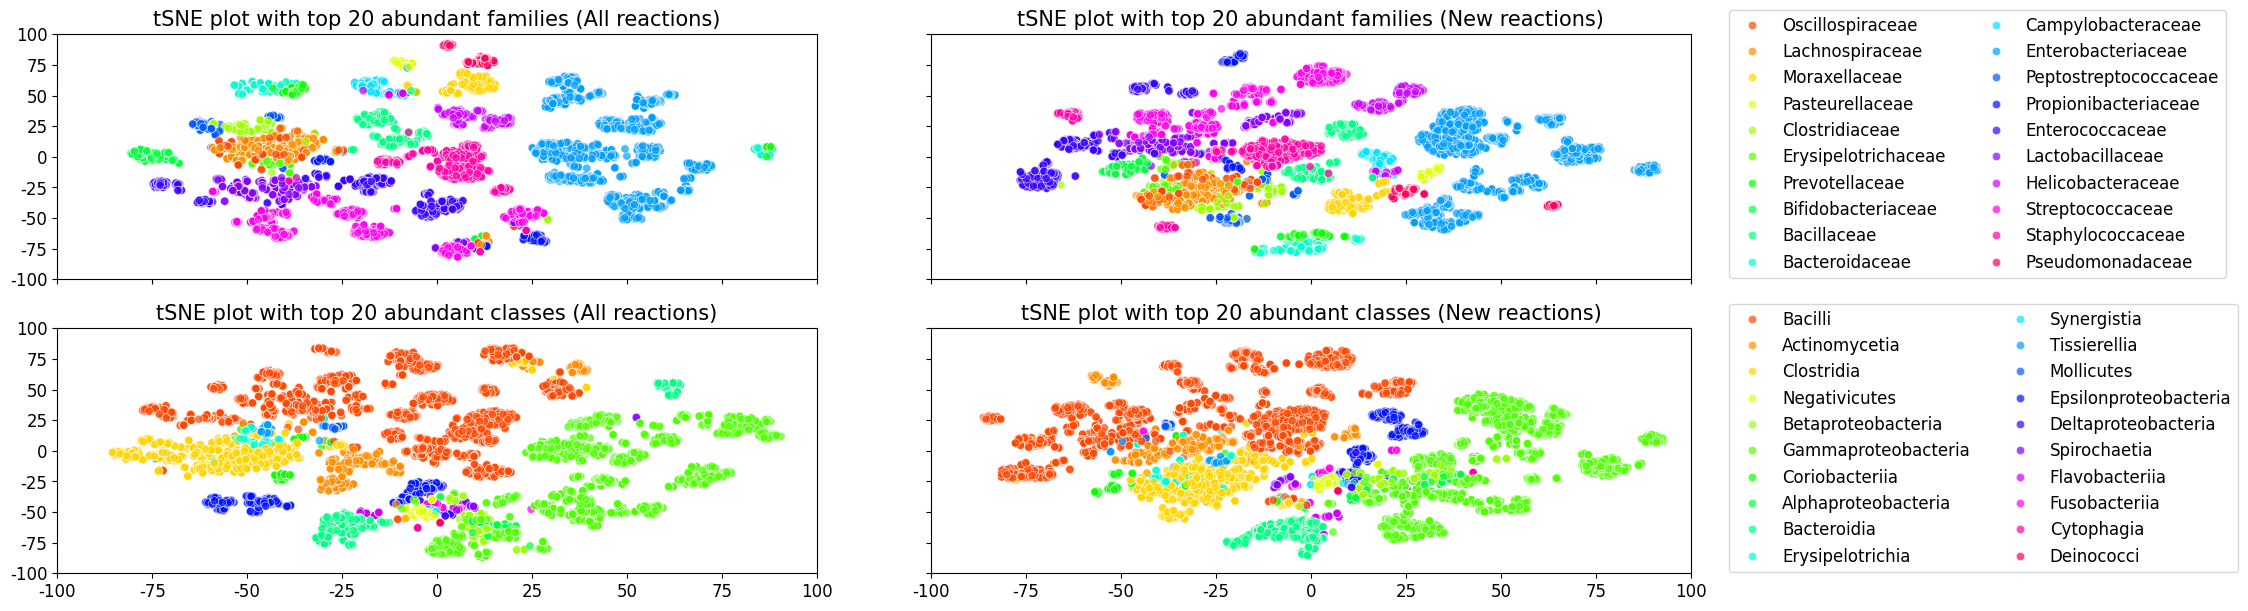

In [51]:
fig,ax=plot_tsne_umap(data1,data2,df_agora_top_family,df_agora_top_class)

In [66]:
# code to plot tsne and umap plots
def plot_tsne_diff_perp(data,df_agora_top_family,df_agora_top_class,tit1,tit2,fig_title):
    fig,ax=plt.subplots(4,4,figsize=(25,25),gridspec_kw={'width_ratios': [1, 0.5, 1, 0.5]})
    # including only the top 20 families
    data1 = data.loc[df_agora_top_family.index]
    X1 = data1.values
    # getting the family names of the samples in data1 in same order as in data1
    y1 = df_agora_top_family.loc[data1.index,'Family'].values
    # including only the top 20 classes
    data2 = data.loc[df_agora_top_class.index]
    X2 = data2.values
    # getting the class names of the samples in data2 in same order as in data2
    y2 = df_agora_top_class.loc[data2.index,'Class'].values

    def plot_tsne(ax, X1, X2, y1, y2, pp, l):
        tsne1 = TSNE(
            n_components=2,             
            perplexity=pp        
        )
        X_tsne1 = tsne1.fit_transform(X1)

        tsne2 = TSNE(
            n_components=2,             
            perplexity=pp        
        )
        X_tsne2 = tsne2.fit_transform(X2)
        
        palette1 = sns.color_palette("hsv", len(np.unique(y1)))
        palette2 = sns.color_palette("hsv", len(np.unique(y2)))

        if l:
            sns.scatterplot(x=X_tsne1[:,0], y=X_tsne1[:,1], hue=y1, palette=palette1, legend='full', alpha=0.7,ax=ax[0])
            sns.scatterplot(x=X_tsne2[:,0], y=X_tsne2[:,1], hue=y2, palette=palette2, legend='full', alpha=0.7,ax=ax[2])
            ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=17)
            ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=17)
        else:
            sns.scatterplot(x=X_tsne1[:,0], y=X_tsne1[:,1], hue=y1, palette=palette1, legend=False, alpha=0.7,ax=ax[0])
            sns.scatterplot(x=X_tsne2[:,0], y=X_tsne2[:,1], hue=y2, palette=palette2, legend=False, alpha=0.7,ax=ax[2])


        # empyting the other two spines
        ax[1].axis('off')
        ax[3].axis('off')

        # increasing the size of the xticklabels and yticklabels
        ax[0].tick_params(axis='x', labelsize=15)
        ax[0].tick_params(axis='y', labelsize=15)
        ax[0].set_title('Perplexity = '+str(pp), fontsize=15)

        ax[2].tick_params(axis='x', labelsize=15)
        ax[2].tick_params(axis='y', labelsize=15)
        ax[2].set_title('Perplexity = '+str(pp), fontsize=15)
    for i in range(4):
        pp = (i+1)*10
        if i==0:
            l = True
        else:
            l = False
        plot_tsne(ax[i], X1, X2, y1, y2, pp,l)
    fig.text(1/4, 0.9, tit1, ha="center", fontsize=18, fontweight="bold")
    fig.text(2/3, 0.9, tit2, ha="center", fontsize=18, fontweight="bold")
    # ax[0,0].set_title(tit1, fontsize=15)
    # ax[0,2].set_title(tit2, fontsize=15)
    plt.savefig(fig_title+'.png', bbox_inches='tight')
    plt.show()


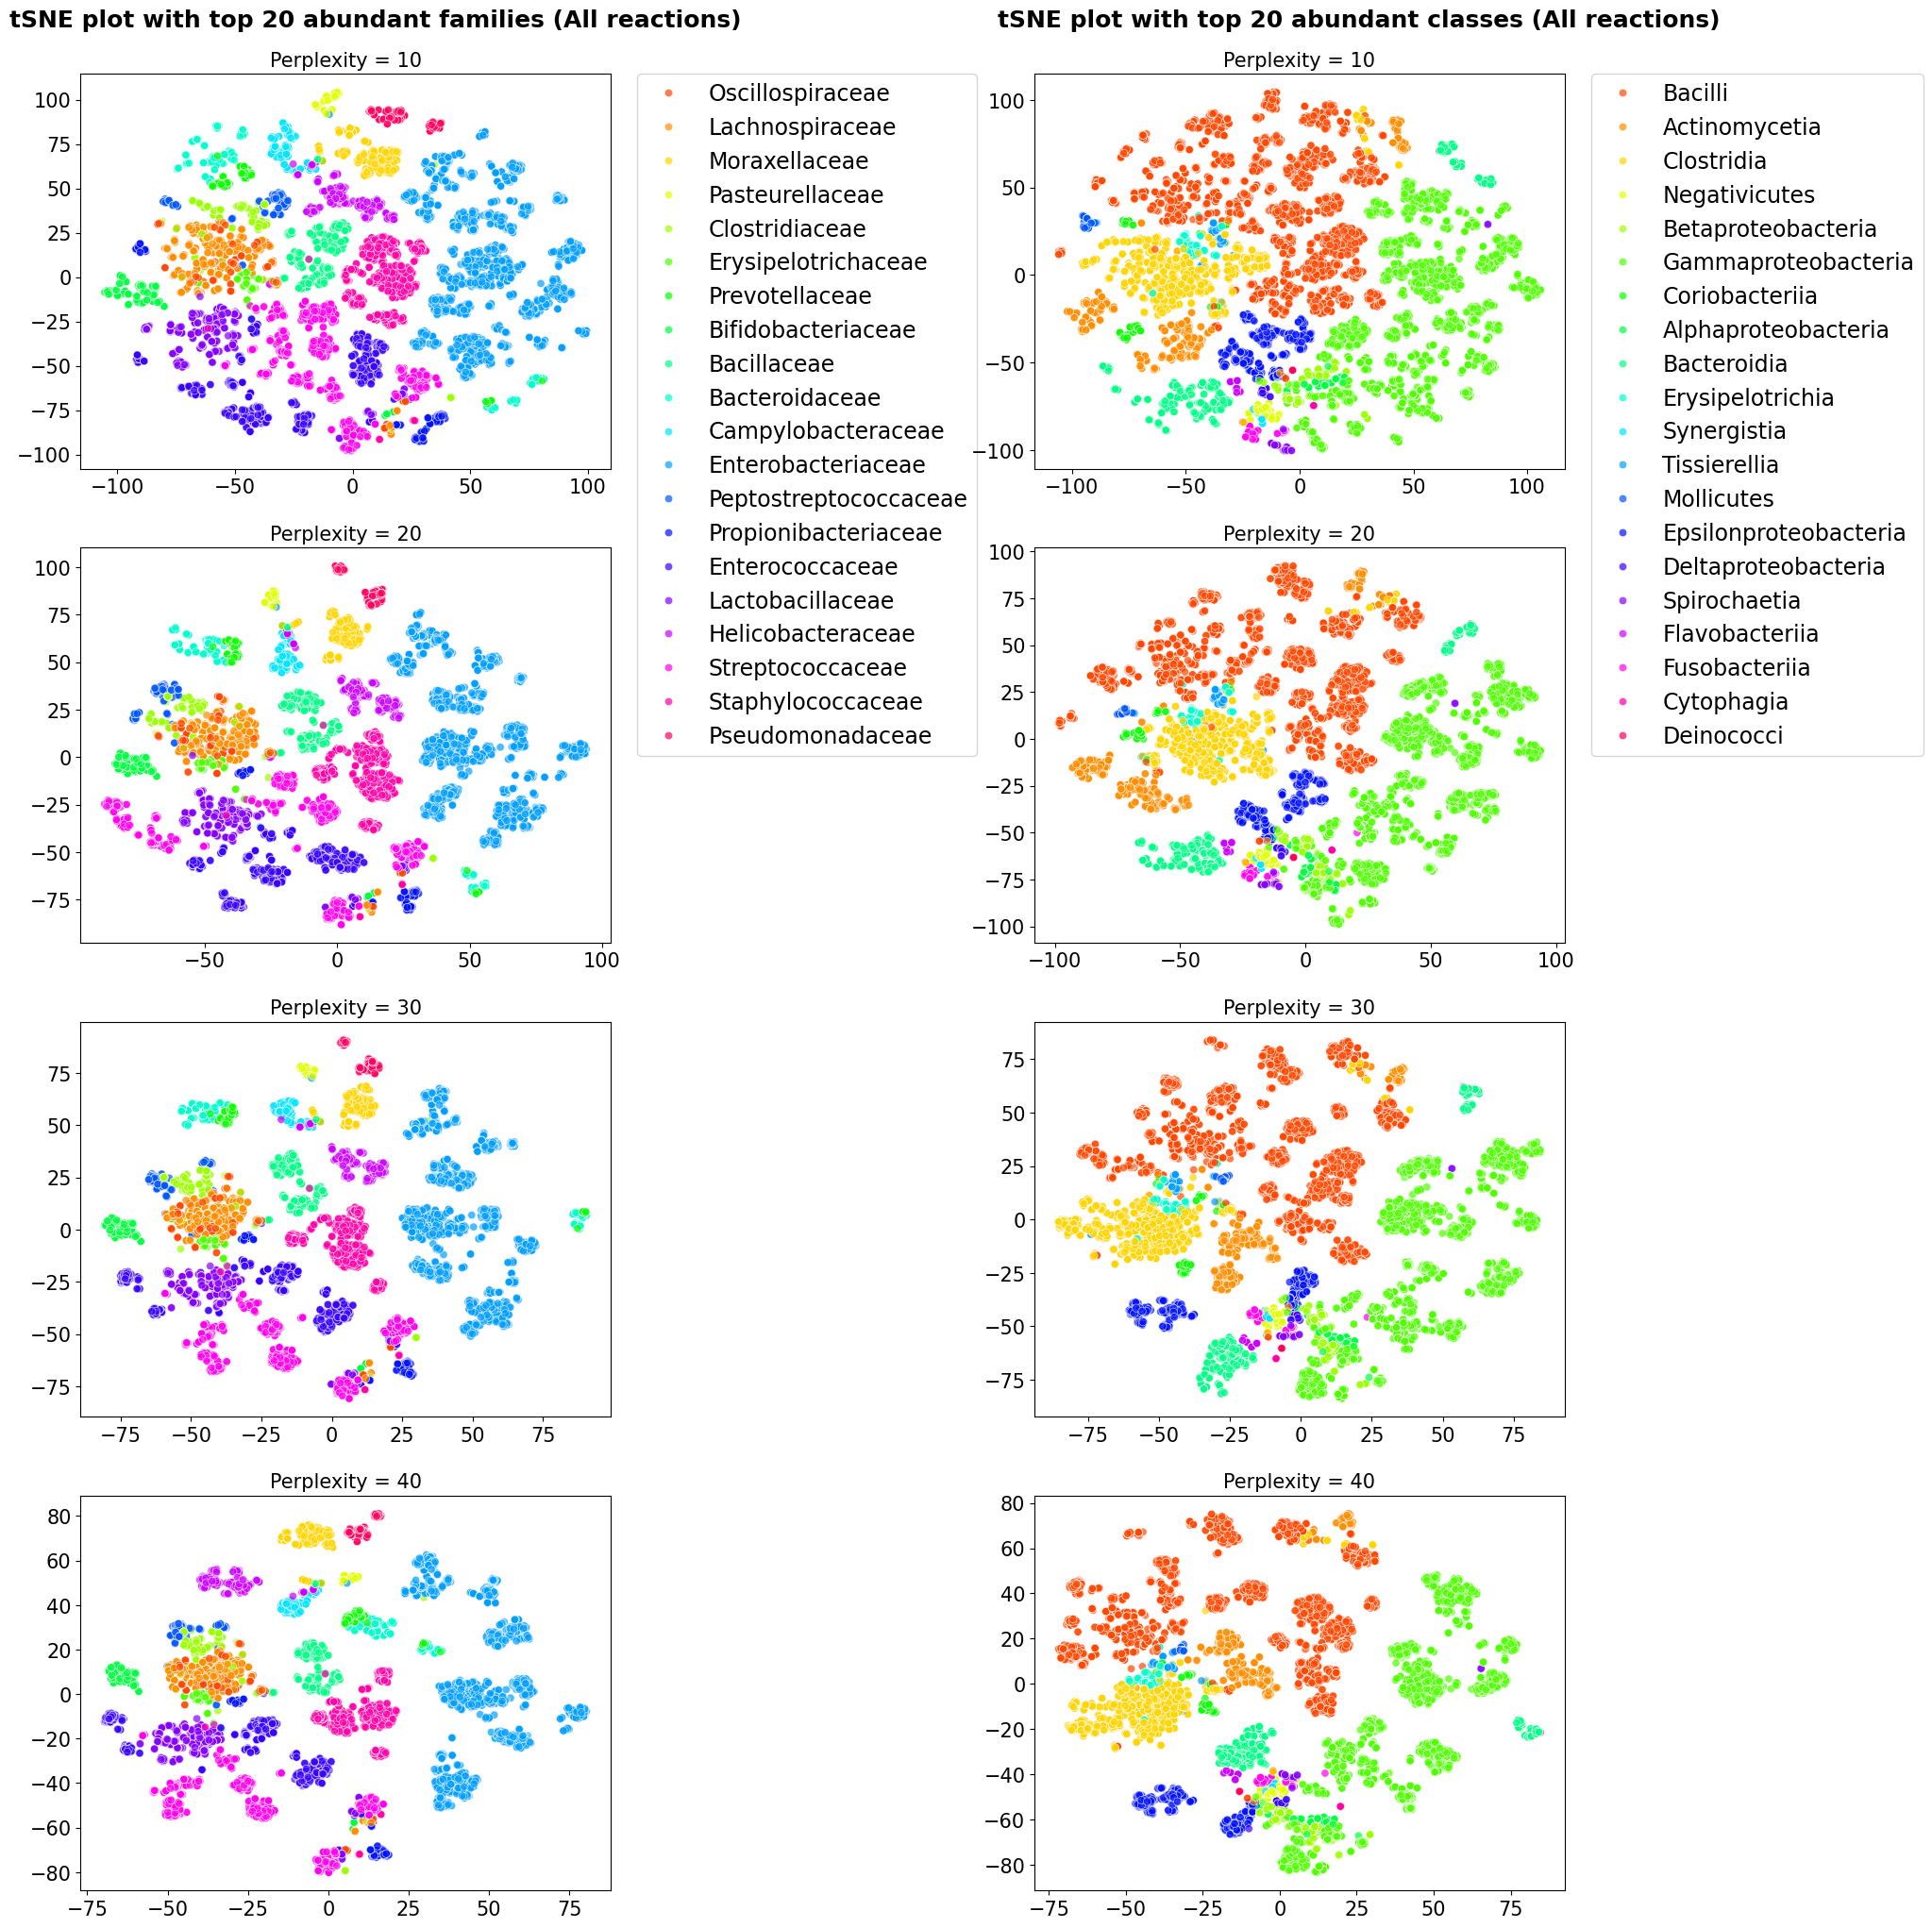

In [67]:
plot_tsne_diff_perp(data1,df_agora_top_family,df_agora_top_class,'tSNE plot with top 20 abundant families (All reactions)','tSNE plot with top 20 abundant classes (All reactions)','tsne_all_rxns_diff_perp')

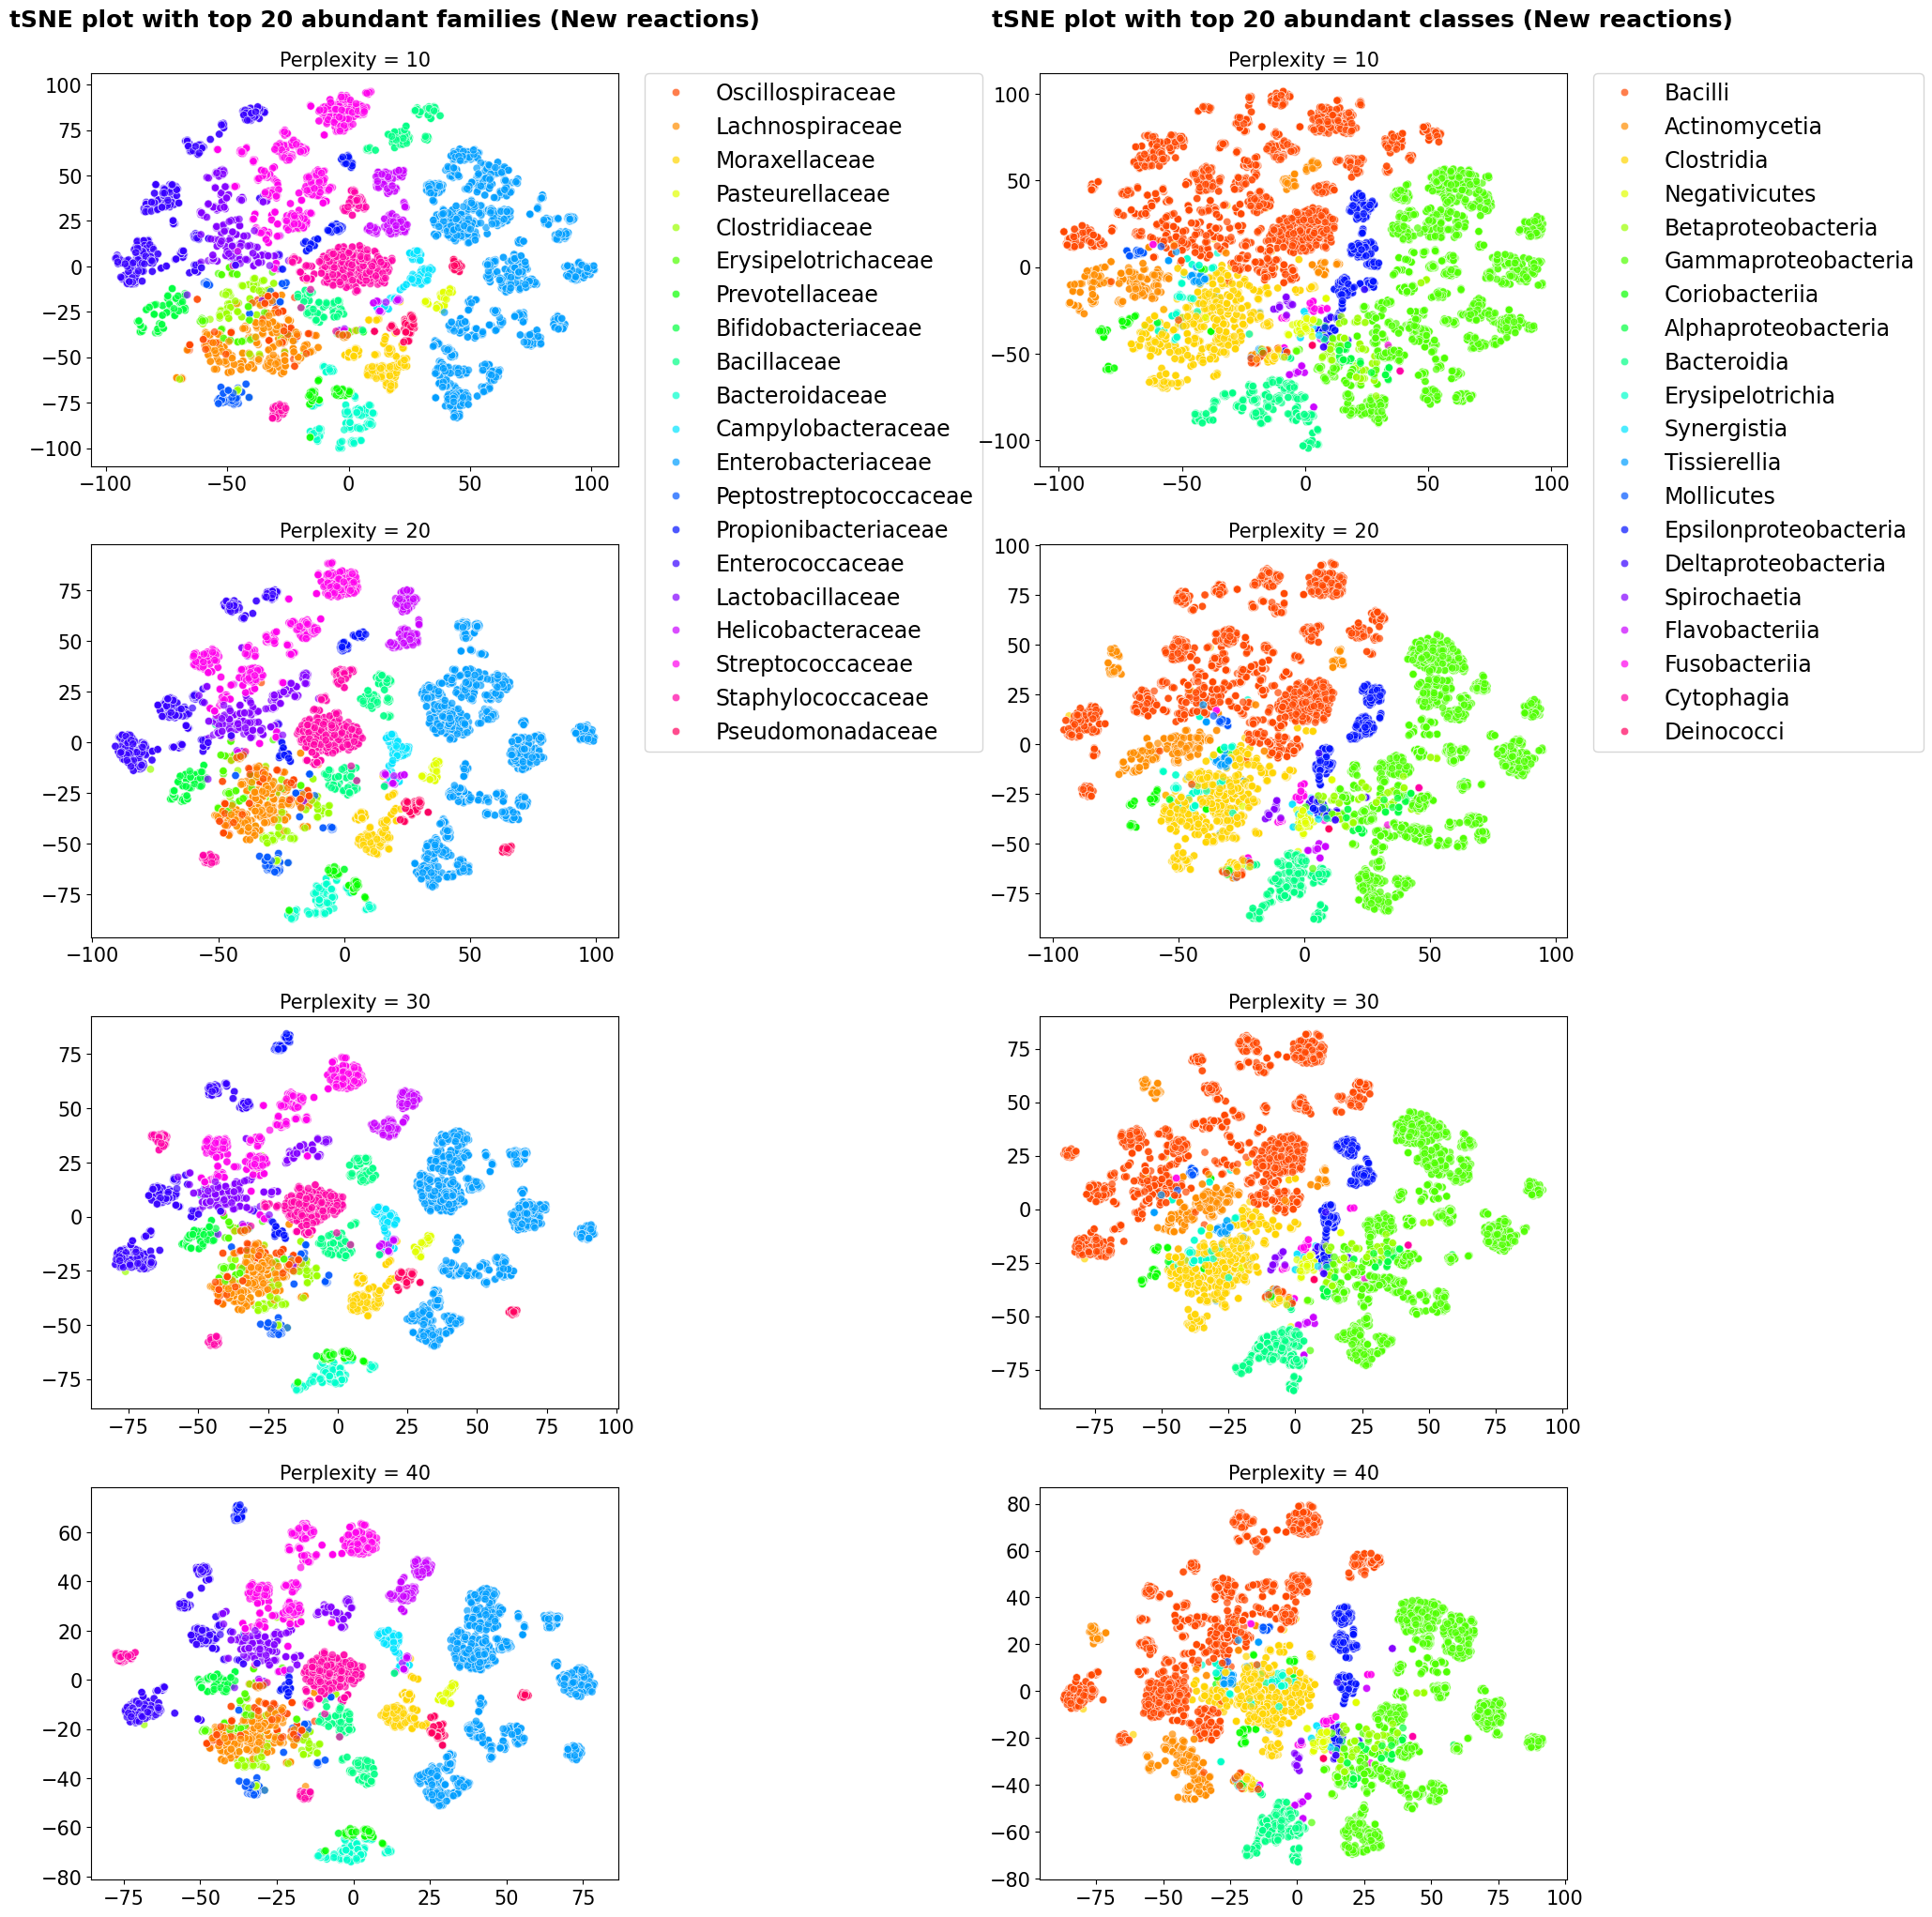

In [68]:
plot_tsne_diff_perp(data2,df_agora_top_family,df_agora_top_class,'tSNE plot with top 20 abundant families (New reactions)','tSNE plot with top 20 abundant classes (New reactions)','tsne_new_rxns_diff_perp')